In [1]:
!nvidia-smi

Fri Mar 14 08:43:36 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!pip install -q \
roboflow \
ultralytics \
supervision==0.9.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.6/932.6 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
!mkdir {HOME}/dataset

In [5]:
# Langkah 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Langkah 2: Meng-copy folder
import shutil

# Ganti 'path_to_your_folder' dengan path folder Anda di Google Drive
source_folder_path = '/content/drive/MyDrive/dataset'
destination_folder_path = '/content/videos'

# Meng-copy seluruh isi folder
shutil.copytree(source_folder_path, destination_folder_path)

# Langkah 3: Verifikasi folder telah di-copy
import os
print(os.listdir(destination_folder_path))


Mounted at /content/drive/
['2025-02-25 14-24-55_dpn_sardo.mp4', '2025-02-25 14-30-42.mp4', '2025-02-25 14-40-36.mp4', '2025-03-04 15-24-06.mp4', '2025-02-25 14-21-12_veteran_2.mp4', '2025-02-25 14-47-28.mp4', '2025-02-25 14-44-26.mp4', '2025-02-25 14-36-28_veteran_1.mp4']


In [6]:
VIDEO_DIR_PATH = f"{HOME}/videos"
IMAGE_DIR_PATH = f"{HOME}/dataset/images/"
FRAME_STRIDE = 50

In [7]:
import supervision as sv
from tqdm.notebook import tqdm

# Daftar semua file video dengan ekstensi tertentu
video_paths = sv.list_files_with_extensions(
    directory=VIDEO_DIR_PATH,
    extensions=["mp4"],  # Tambahkan ekstensi lain jika diperlukan, misalnya ["mov", "mp4"]
)

print('Total videos:', len(video_paths))

# Proses semua video dan simpan frame ke satu folder
for video_path in tqdm(video_paths):
    video_name = video_path.stem  # Nama video tanpa ekstensi
    image_name_pattern = video_name + "-{:05d}.png"  # Pola penamaan untuk frame

    # Gunakan ImageSink untuk menyimpan frame ke folder tunggal
    with sv.ImageSink(target_dir_path=IMAGE_DIR_PATH, image_name_pattern=image_name_pattern) as sink:
        for image in sv.get_video_frames_generator(source_path=str(video_path), stride=FRAME_STRIDE):
            sink.save_image(image=image)


Total videos: 8


  0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png"])

print('image count:', len(image_paths))

image count: 942


In [9]:
IMAGE_DIR_PATH = f"{HOME}/dataset/images/"
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

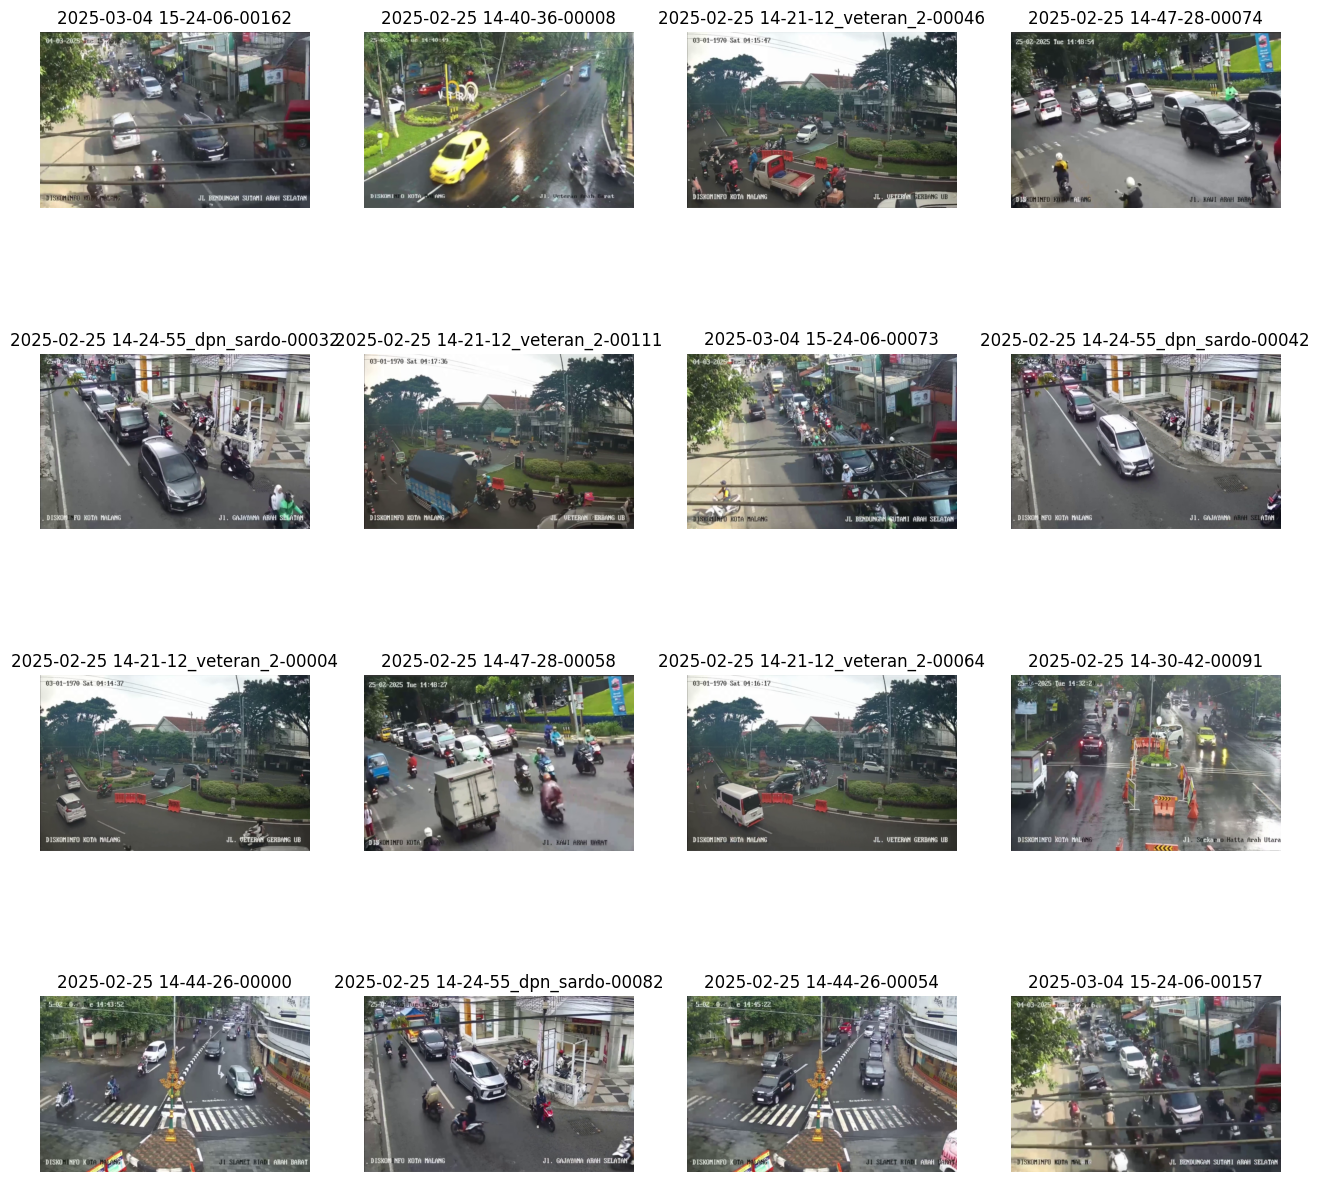

In [10]:
import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

In [11]:
DATASET_DIR_PATH = f"{HOME}/dataset"

In [12]:
from ultralytics import YOLO
import os

# Load model YOLOv8
model = YOLO("yolov8x.pt")  # Ganti dengan path model pre-trained atau custom

# Path ke folder dataset
dataset_dir = IMAGE_DIR_PATH  # Folder yang berisi gambar-gambar
output_dir = f"{HOME}/dataset/labels/"  # Folder untuk menyimpan file .txt

# Buat folder output jika belum ada
os.makedirs(output_dir, exist_ok=True)

# Mapping nama kelas
class_mapping = {
    2: "car",
    3: "motorcycle",
    5: "bus",
    7: "truck",
}

# Daftar kelas yang ingin disimpan
allowed_classes = ["car", "truck", "bus", "motorcycle"]

# Proses setiap gambar dalam folder dataset
for image_name in os.listdir(dataset_dir):
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(dataset_dir, image_name)
        txt_name = os.path.splitext(image_name)[0] + ".txt"
        txt_path = os.path.join(output_dir, txt_name)

        # Jalankan inferensi
        results = model(image_path)

        # Simpan hasil deteksi dalam format .txt
        with open(txt_path, "w") as f:
            for result in results:
                boxes = result.boxes  # Bounding box
                for box in boxes:
                    class_id = int(box.cls)  # ID kelas
                    class_name = class_mapping.get(class_id, None)  # Dapatkan nama kelas

                    # Filter hanya untuk kelas yang diizinkan
                    if class_name in allowed_classes:
                        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()  # Koordinat bounding box
                        width, height = x2 - x1, y2 - y1
                        x_center = (x1 + x2) / 2
                        y_center = (y1 + y2) / 2

                        # Normalisasi koordinat
                        img_height, img_width = result.orig_shape
                        x_center /= img_width
                        y_center /= img_height
                        width /= img_width
                        height /= img_height

                        # Tulis ke file .txt dengan ID kelas numerik
                        f.write(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 131M/131M [00:01<00:00, 134MB/s]



image 1/1 /content/dataset/images/2025-03-04 15-24-06-00162.png: 448x640 6 persons, 5 cars, 6 motorcycles, 1 bus, 101.7ms
Speed: 8.6ms preprocess, 101.7ms inference, 341.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/images/2025-02-25 14-40-36-00008.png: 448x640 1 person, 6 cars, 1 motorcycle, 2 trucks, 63.1ms
Speed: 3.5ms preprocess, 63.1ms inference, 2.2ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/images/2025-02-25 14-21-12_veteran_2-00046.png: 448x640 11 persons, 5 cars, 12 motorcycles, 1 bus, 2 trucks, 60.5ms
Speed: 2.4ms preprocess, 60.5ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/images/2025-02-25 14-47-28-00074.png: 448x640 6 persons, 11 cars, 5 motorcycles, 1 truck, 58.7ms
Speed: 2.2ms preprocess, 58.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /content/dataset/images/2025-02-25 14-24-55_dpn_sardo-00032.png: 448x640 13 persons

In [13]:
import supervision as sv

image_paths = sv.list_files_with_extensions(
    directory="/content/dataset/labels",
    extensions=["txt"])

print('image count:', len(image_paths))

image count: 942


In [14]:
from google.colab import drive
drive.mount('/content/drive')

!cp -r /content/dataset/ /content/drive/MyDrive/result_auto_label

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import roboflow
API_KEY = "Lb0PooJZEqTfVuwBuk6w"
rf = roboflow.Roboflow(api_key=API_KEY)

# get a workspace
workspace = rf.workspace("auto-label-buzm8")

# Upload data set to a new/existing project
workspace.upload_dataset(
    "./dataset/", # This is your dataset path
    "transportation-50", # This will either create or get a dataset with the given ID
    num_workers=10,
    project_license="MIT",
    project_type="object-detection",
    batch_name=None,
    num_retries=0,
    dataset_format="yolov8",
)

loading Roboflow workspace...
loading Roboflow project...
Uploading to existing project auto-label-buzm8/transportation-50
[UPLOADED] ./dataset/images/2025-02-25 14-21-12_veteran_2-00003.png (pSmeS20tXhZWRdBmCjsG) [2.9s] / annotations = OK [0.4s]
[UPLOADED] ./dataset/images/2025-02-25 14-21-12_veteran_2-00002.png (QeW4UqnbnUiUjUU8IORS) [3.0s] / annotations = OK [0.4s]
[UPLOADED] ./dataset/images/2025-02-25 14-21-12_veteran_2-00000.png (CBDJ56fSNfnbNrdKtKmJ) [3.1s] / annotations = OK [0.5s]
[UPLOADED] ./dataset/images/2025-02-25 14-21-12_veteran_2-00005.png (WCN1PNrmX1ejDTAh0GMD) [3.1s] / annotations = OK [0.5s]
[UPLOADED] ./dataset/images/2025-02-25 14-21-12_veteran_2-00001.png (n5SDqPk75CzEZivhRUZ1) [3.2s] / annotations = OK [0.5s]
[UPLOADED] ./dataset/images/2025-02-25 14-21-12_veteran_2-00006.png (JSoiNJI8sKQqojLvhsl6) [3.2s] / annotations = OK [0.5s]
[UPLOADED] ./dataset/images/2025-02-25 14-21-12_veteran_2-00004.png (cGdg4EVjoMtLBStjjV7m) [3.2s] / annotations = OK [0.5s]
[UPLOADED

In [ ]:
import shutil
shutil.rmtree('/content/dataset/labels')
# shutil.rmtree('/content/drive')
# shutil.rmtree('/content/videos')
